In [1]:
import pandas as pd
import numpy as np

In [2]:
import hopsworks
import traceback

try:
    # Log into Hopsworks using your API key
    project = hopsworks.login(api_key_value="XFKfGTJB5iMbkc1G.7OjpYGryvNZexk2jMqsZPJ2kvX9SAwstMiYoWsQBVUMYBzDOjhajGNlkx9IbuFsC")
    print("Logged into Hopsworks successfully.")
    
    # Access the feature store
    fs = project.get_feature_store()
    print("Feature store accessed successfully.")

except Exception as e:
    print(f"An error occurred: {e}")
    traceback.print_exc()


Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1063063
Logged into Hopsworks successfully.
2024-11-06 22:48:31,815 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.
Feature store accessed successfully.


In [3]:

# Example of getting feature groups by their names and versions
truck_delay_df = fs.get_feature_group("final_dataset", version=1).read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.74s) 


In [4]:
truck_delay_df

,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,...,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight,index,eventtime
0,11548897,R-5d24485c,2019-01-07 07:00:00+00:00,2019-01-07 15:57:36+00:00,1,34.333333,11.000000,0.000,81.666667,5.333333,...,male,46.0,5.0,proactive,3.0,11548897.0,58.42,0,6293,2024-10-07
1,72777903,R-eb3ad4c1,2019-01-01 07:00:00+00:00,2019-01-01 22:22:12+00:00,0,58.500000,12.500000,0.000,34.750000,6.000000,...,male,51.0,11.0,proactive,4.0,72777903.0,62.62,0,3969,2024-10-07
2,63036432,R-68ecb793,2019-02-06 07:00:00+00:00,2019-02-06 23:37:12+00:00,0,46.250000,9.500000,0.000,61.500000,6.000000,...,male,40.0,6.0,conservative,4.0,63036432.0,41.31,0,7551,2024-10-07
3,22458296,R-8d03a72c,2019-02-12 07:00:00+00:00,2019-02-13 05:45:36+00:00,1,61.400000,7.400000,0.000,84.200000,4.000000,...,male,51.0,14.0,proactive,5.0,22458296.0,58.70,1,9931,2024-10-07
4,28389523,R-941df974,2019-01-25 07:00:00+00:00,2019-01-25 15:48:00+00:00,1,46.000000,5.666667,0.000,78.333333,6.000000,...,male,37.0,7.0,proactive,2.0,28389523.0,59.53,0,9827,2024-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10477,22811669,R-fe6d6bb4,2019-01-01 07:00:00+00:00,2019-01-01 13:21:36+00:00,0,42.000000,11.500000,0.000,81.000000,5.500000,...,female,44.0,12.0,proactive,6.0,22811669.0,59.33,0,5591,2024-10-07
10478,23244180,R-c8bee627,2019-01-07 07:00:00+00:00,2019-01-07 23:49:48+00:00,0,69.500000,10.500000,0.000,61.750000,6.000000,...,male,50.0,10.0,conservative,2.0,23244180.0,52.27,0,8415,2024-10-07
10479,61292553,R-41fb82a2,2019-01-01 07:00:00+00:00,2019-01-01 13:59:24+00:00,0,51.000000,9.666667,0.000,86.000000,6.000000,...,male,50.0,14.0,proactive,4.0,61292553.0,59.89,0,833,2024-10-07
10480,14357029,R-36ae60d9,2019-01-19 07:00:00+00:00,2019-01-19 07:40:48+00:00,1,27.500000,13.500000,0.000,68.000000,6.000000,...,male,42.0,9.0,conservative,3.0,14357029.0,42.84,0,5694,2024-10-07


In [5]:
truck_delay_df['delay'].value_counts()

delay
0    6996
1    3486
Name: count, dtype: int64

In [6]:
# 0 = eventrate : 0.66
# 1 = 0.33

In [7]:
truck_delay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   truck_id                        10482 non-null  int64              
 1   route_id                        10482 non-null  object             
 2   departure_date                  10482 non-null  datetime64[us, UTC]
 3   estimated_arrival               10482 non-null  datetime64[us, UTC]
 4   delay                           10482 non-null  int64              
 5   route_avg_temp                  10482 non-null  float64            
 6   route_avg_wind_speed            10482 non-null  float64            
 7   route_avg_precip                10482 non-null  float64            
 8   route_avg_humidity              10482 non-null  float64            
 9   route_avg_visibility            10482 non-null  float64            
 10  route_avg_

In [8]:
truck_delay_df.shape

(10482, 50)

In [9]:
truck_delay_df.isnull().sum()

truck_id                          0
route_id                          0
departure_date                    0
estimated_arrival                 0
delay                             0
route_avg_temp                    0
route_avg_wind_speed              0
route_avg_precip                  0
route_avg_humidity                0
route_avg_visibility              0
route_avg_pressure                0
route_description                 0
estimated_arrival_nearest_hour    0
departure_date_nearest_hour       0
origin_id                         0
destination_id                    0
distance                          0
average_hours                     0
temp_origin                       0
wind_speed_origin                 0
description_origin                0
precip_origin                     0
humidity_origin                   0
visibility_origin                 0
pressure_origin                   0
temp_destination                  0
wind_speed_destination            0
description_destination     

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, cols):
    # Iterate over each column
    for col in cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


In [12]:
# Function to visualize data before and after outlier removal
def visualize_outliers_removal(df_before, df_after, cols):
    n_cols = len(cols)  # Number of continuous columns
    fig, axes = plt.subplots(n_cols, 2, figsize=(12, n_cols * 3))
    
    for i, col in enumerate(cols):
        # Before outlier removal
        sns.boxplot(ax=axes[i, 0], data=df_before[col], color='skyblue')
        axes[i, 0].set_title(f'{col} - Before Outlier Removal')

        # After outlier removal
        sns.boxplot(ax=axes[i, 1], data=df_after[col], color='lightgreen')
        axes[i, 1].set_title(f'{col} - After Outlier Removal')

    plt.tight_layout()
    plt.show()

In [13]:
# Define continuous and categorical columns
cts_cols = ['route_avg_temp', 'route_avg_wind_speed', 'route_avg_precip', 'route_avg_humidity', 'route_avg_visibility', 'route_avg_pressure', 'distance', 'average_hours', 'temp_origin', 'wind_speed_origin', 'precip_origin', 'humidity_origin', 'visibility_origin', 'pressure_origin', 'temp_destination', 'wind_speed_destination', 'precip_destination', 'humidity_destination', 'visibility_destination', 'pressure_destination', 'avg_no_of_vehicles', 'truck_age', 'load_capacity_pounds', 'mileage_mpg', 'age', 'experience', 'average_speed_mph']
cat_cols = ['route_description', 'description_origin', 'description_destination', 'accident', 'fuel_type', 'gender', 'driving_style', 'ratings', 'is_midnight']
target = ['delay']


In [14]:
 # Remove outliers from the continuous columns
truck_delay_cleaned_df = remove_outliers(truck_delay_df, cts_cols)

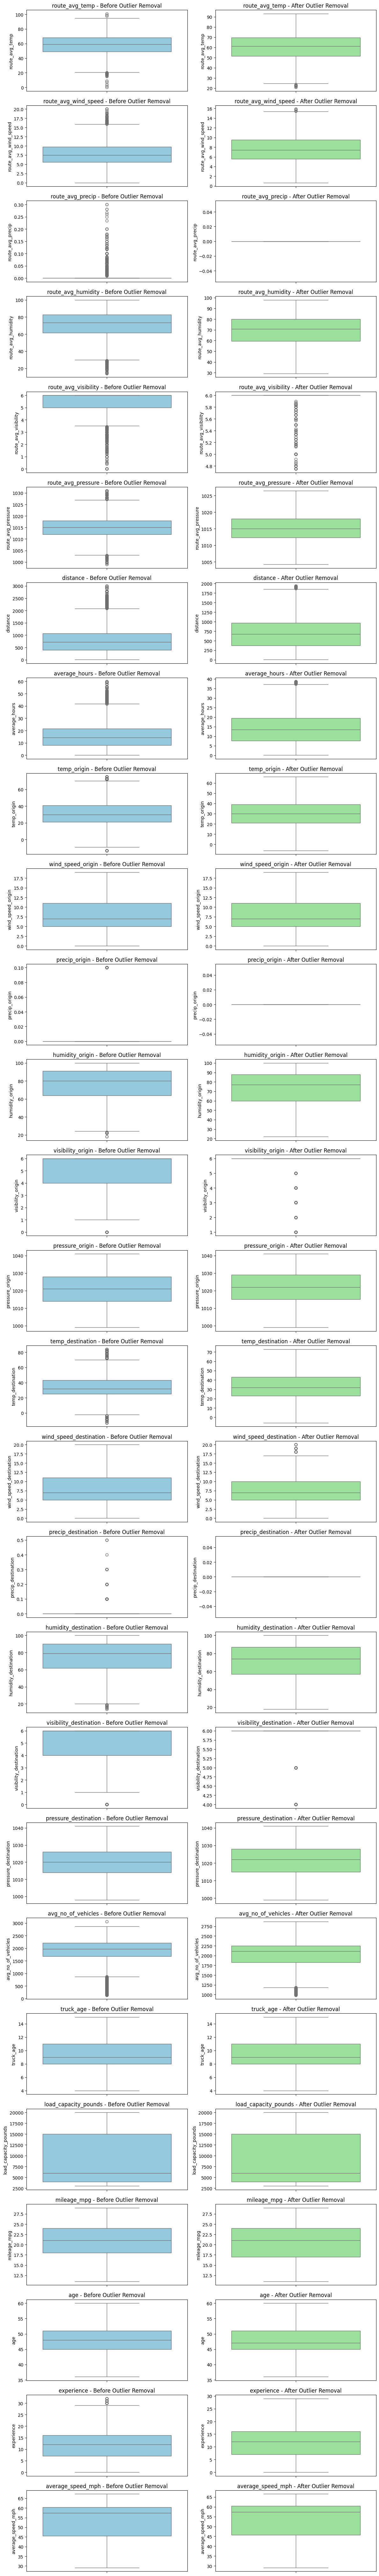

In [15]:

# Visualize all continuous columns before and after outlier removal
visualize_outliers_removal(truck_delay_df, truck_delay_cleaned_df, cts_cols)

In [16]:
truck_delay_cleaned_df.shape

(4681, 50)

In [17]:
import pandas as pd

# Assuming truck_delay_df is your DataFrame and 'estimated_arrival' and 'departure_date' are the datetime columns
# Convert from timezone-aware to timezone-naive, while also converting to nanosecond precision if not already
truck_delay_df['estimated_arrival'] = truck_delay_df['estimated_arrival'].dt.tz_localize(None).astype('datetime64[ns]')

# Check the conversion
print(truck_delay_df['estimated_arrival'].dtype)


# Checking the updated date range
print(truck_delay_df['estimated_arrival'].min(), truck_delay_df['estimated_arrival'].max())


datetime64[ns]
2019-01-01 07:04:48 2019-02-13 06:46:48


In [18]:
train_df = truck_delay_df[truck_delay_df['estimated_arrival'] <= pd.to_datetime('2019-01-30')]
       
validation_df = truck_delay_df[(truck_delay_df['estimated_arrival'] > pd.to_datetime('2019-01-30')) &
       
                                   (truck_delay_df['estimated_arrival'] <= pd.to_datetime('2019-02-07'))]
       
test_df = truck_delay_df[truck_delay_df['estimated_arrival'] > pd.to_datetime('2019-02-07')]



In [19]:
# Reset the index for all splits to ensure alignment
train_df.reset_index(drop=True, inplace=True)
validation_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [20]:
# Selection of features and target for each dataset
X_train = train_df[cts_cols + cat_cols]
y_train = train_df['delay']
X_valid = validation_df[cts_cols + cat_cols]
y_valid = validation_df['delay']
X_test = test_df[cts_cols + cat_cols]
y_test = test_df['delay']

In [21]:
X_train.shape

(7299, 36)

In [22]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ecoder_columns = ['route_description', 'description_origin', 'description_destination', 'fuel_type', 'gender', 'driving_style']

# Initializing the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[ecoder_columns]) 

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [23]:

encoded_features = list(encoder.get_feature_names_out(ecoder_columns))

In [24]:
# Transform the training, validation, and test sets
X_train[encoded_features] = encoder.transform(X_train[ecoder_columns])

X_valid[encoded_features] = encoder.transform(X_valid[ecoder_columns])

X_test[encoded_features] = encoder.transform(X_test[ecoder_columns])

2024-11-06 22:49:27,874 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2024-11-06 22:49:27,875 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2024-11-06 22:49:27,876 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2024-11-06 22:49:27,876 WARNING: S

In [25]:
X_train.shape

(7299, 149)

In [26]:

X_train = X_train.drop(ecoder_columns, axis=1)
X_valid = X_valid.drop(ecoder_columns, axis=1)

X_test = X_test.drop(ecoder_columns, axis=1)

In [27]:
print("Shape of X_train_encoded:", X_train.shape)
print("Shape of X_train_encoded_df:", X_valid.shape)


Shape of X_train_encoded: (7299, 143)
Shape of X_train_encoded_df: (1910, 143)


In [28]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[cts_cols] = scaler.fit_transform(X_train[cts_cols])
X_valid[cts_cols] = scaler.transform(X_valid[cts_cols])
X_test[cts_cols] = scaler.transform(X_test[cts_cols])

In [31]:
X_train

,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,distance,average_hours,temp_origin,wind_speed_origin,...,description_destination_Patchy rain possible,description_destination_Patchy snow possible,description_destination_Sunny,description_destination_Torrential rain shower,fuel_type_diesel,fuel_type_gas,gender_female,gender_male,driving_style_conservative,driving_style_proactive
0,-1.809180,1.052570,-0.287846,0.667280,-0.063815,0.090262,-0.655313,-0.655096,1.500818,0.664771,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.011969,1.548664,-0.287846,-2.502905,0.600953,-0.323967,-0.089050,-0.088811,-1.793551,-1.258592,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-0.941561,-0.711319,-0.287846,0.442045,0.600953,2.123750,-0.669536,-0.669231,-0.579836,1.386032,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.854651,-0.204201,-0.287846,-1.391370,0.600953,-1.114768,0.509247,0.509279,-2.024735,-0.537331,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.359867,0.887206,-0.287846,1.230368,0.600953,-0.888825,-0.625258,-0.625059,2.425554,1.386032,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,-0.160704,1.300617,-0.287846,-0.425111,0.600953,-1.566654,0.021397,0.021619,0.344899,-1.739432,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7295,-1.239030,1.217935,-0.287846,0.622233,0.102377,-0.549910,-0.884634,-0.884791,1.327430,0.905191,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7296,0.806071,0.887206,-0.287846,-0.678500,0.600953,-1.453682,0.040108,0.040172,0.576083,-0.296910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7297,-0.569724,0.611598,-0.287846,0.960085,0.600953,1.069349,-0.829225,-0.829134,0.576083,0.183930,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [30]:
X_train.shape

(7299, 143)

In [29]:
import mlflow
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import os




In [30]:


# mlflow_dir = '/Users/jeevanapathipati/Documents/TruckDelay/notebooks/mlruns'
# mlflow.set_tracking_uri(f'file://{mlflow_dir}')

# print("Tracking URI:", mlflow.get_tracking_uri())

# # Optionally create or get an experiment
# mlflow.set_experiment("My_Experiment")
# experiment = mlflow.get_experiment_by_name("My_Experiment")
# print("Experiment ID:", experiment.experiment_id)



In [31]:
# with mlflow.start_run():
#     mlflow.log_param("test", "value")
#     mlflow.log_metric("metric", 123)
#     print("Test run completed. Check the MLflow UI.")
# mlflow.end_run()


In [32]:

from sklearn.metrics import accuracy_score, classification_report

# Data Modeling

In [33]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

def run_model_training(model, param_grid, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test):
    try:
        # Define the PCA component
        pca = PCA(n_components=0.95)  # Retain 95% of variance
        
        # Create a pipeline combining PCA and the model
        pipeline = Pipeline([
            ('pca', pca),
            ('model', model)
        ])

        # Update the parameter grid for the pipeline
        param_grid = {'model__' + key: value for key, value in param_grid.items()}

        # Initialize GridSearchCV with the pipeline
        grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
        print(f"Training {model_name} with GridSearchCV...")
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        print(f"Best parameters for {model_name}: {best_params}")

        # Prediction and reporting for train, validation, and test sets
        train_predictions = grid_search.predict(X_train)
        print(f"Training Classification Report for {model_name}:\n", classification_report(y_train, train_predictions))

        valid_predictions = grid_search.predict(X_valid)
        print(f"Validation Classification Report for {model_name}:\n", classification_report(y_valid, valid_predictions))

        test_predictions = grid_search.predict(X_test)
        print(f"Test Classification Report for {model_name}:\n", classification_report(y_test, test_predictions))

    except Exception as e:
        print(f"An error occurred while training {model_name}: {e}")
        raise

    return classification_report(y_train, train_predictions, output_dict=True), \
           classification_report(y_valid, valid_predictions, output_dict=True), \
           classification_report(y_test, test_predictions, output_dict=True)

# Initialize models and parameter grids including PCA in the training process
models_info = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': ['balanced']
    }),
    'Logistic Regression': (LogisticRegression(max_iter=300), {
        'C': [0.1, 1],
        'solver': ['liblinear'],
        'class_weight': ['balanced']
    }),
    'XGBoost': (XGBClassifier(), {
        'max_depth': [3, 5],
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'reg_lambda': [0.1, 1],
        'reg_alpha': [0.1, 1]
    })
}

# Train and evaluate models
for model_name, (model, params) in models_info.items():
    print(f"Training and evaluating {model_name}...")
    train_report, valid_report, test_report = run_model_training(model, params, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test)


Training and evaluating Random Forest...
Training Random Forest with GridSearchCV...
Best parameters for Random Forest: {'model__class_weight': 'balanced', 'model__max_depth': 15, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Training Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5040
           1       1.00      0.97      0.98      2259

    accuracy                           0.99      7299
   macro avg       0.99      0.98      0.99      7299
weighted avg       0.99      0.99      0.99      7299

Validation Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84      1297
           1       0.75      0.33      0.46       613

    accuracy                           0.75      1910
   macro avg       0.75      0.64      0.65      1910
weighted avg       0.75     

In [34]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# def run_model_training(model, param_grid, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test):
#     try:
#         # Initialize GridSearchCV
#         grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
        
#         # Fitting the model with training data
#         print(f"Training {model_name} with GridSearchCV...")
#         grid_search.fit(X_train, y_train)

#         # Get the best parameters found by GridSearchCV
#         best_params = grid_search.best_params_
#         print(f"Best parameters for {model_name}: {best_params}")

#         # Predict on the training set
#         train_predictions = grid_search.predict(X_train)
#         train_report = classification_report(y_train, train_predictions, output_dict=True)
#         print(f"Training Classification Report for {model_name}:\n", classification_report(y_train, train_predictions))

#         # Predict on the validation set
#         valid_predictions = grid_search.predict(X_valid)
#         valid_report = classification_report(y_valid, valid_predictions, output_dict=True)
#         print(f"Validation Classification Report for {model_name}:\n", classification_report(y_valid, valid_predictions))

#         # Predict on the test set
#         test_predictions = grid_search.predict(X_test)
#         test_report = classification_report(y_test, test_predictions, output_dict=True)
#         print(f"Test Classification Report for {model_name}:\n", classification_report(y_test, test_predictions))

#     except Exception as e:
#         print(f"An error occurred while training {model_name}: {e}")
#         raise  # Re-raise the exception to debug if necessary

#     return train_report, valid_report, test_report  # Returning the test report as well


In [35]:
# # Initialize and run model training with modified parameters
# model_reports = {}
# models_info = {
#     'Random Forest': (RandomForestClassifier(), {
#         'n_estimators': [50, 100],  # Reduced to speed up training
#         'max_depth': [10, 15],  # Moderate depth for faster and more generalizable splits
#         'min_samples_split': [2, 5],  # Moderate split to prevent overfitting
#         'min_samples_leaf': [1, 2],  # Prevent overfitting on very small leafs
#         'class_weight': ['balanced']  # Handle class imbalance
#     }),
#     'Logistic Regression': (LogisticRegression(max_iter=300), {  # Reduced iterations for faster convergence
#         'C': [0.1, 1],  # Simplified range for regularization
#         'solver': ['liblinear'],  # Faster solver for small datasets
#         'class_weight': ['balanced']  # Handle class imbalance
#     }),
#     'XGBoost': (XGBClassifier(), {
#         'max_depth': [3, 5],  # Reduced depth for faster training
#         'n_estimators': [50, 100],  # Reduced number of trees
#         'learning_rate': [0.05, 0.1],  # Focused learning rate
#         'subsample': [0.8],  # Consistent subsample
#         'colsample_bytree': [0.8],  # Reduce number of features per tree
#         'reg_lambda': [0.1, 1],  # L2 regularization to prevent overfitting
#         'reg_alpha': [0.1, 1]  # L1 regularization to handle sparsity
#     })
# }

# # Train and evaluate models
# for model_name, (model, params) in models_info.items():
#     print(f"Training and evaluating {model_name}...")
    
#     train_report, valid_report, test_report = run_model_training(model, params, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test)


